# CIS 105 Final Project 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import math
from scipy.stats import norm
pd.options.mode.chained_assignment = None 
def intify(x):
    return int(x)
def floatify(x):
    return float(x)

## Abstract

Using various analytical tools to explore data from approximately 1500 players who competed in the NFL combine in the years 2010-2014, I was able to closely examine and understand trends in players' combine performances, and how their performances affect their value in the eyes of NFL teams. The source of this data is a csv compiled by professional sports analyst Daren Wilman, downloaded from his website, NFLsavant. Through this project I use tools such as permutation testing, linear regression, and various data vizualizations to identify correlations in certain combine statistics (ex. 40 yd dash and broad jump), and to compare statistics between different position groups.

## Data Cleaning

In [4]:
combine = pd.read_csv('/Users/Owner/Downloads/combine.csv')

combine = combine[['year', 'name', 'position', 'heightinchestotal', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench', 'round','picktotal', 'college']]
combine = combine.rename(columns = {'year' : 'Year',
                                    'name' : 'Name',
                                    'position' : 'Position', 
                                    'heightinchestotal' : 'Height (in)',
                                    'weight' : 'Weight (lbs)', 
                                    'fortyyd' : '40 Yard Dash', 
                                    'twentyss' : '20 Yard Shuttle',
                                    'threecone' : '3-Cone Drill', 
                                    'vertical' : 'Vertical Jump (in)',
                                    'broad' : 'Broad Jump (in)',
                                    'round' : 'Round Drafted',
                                    'picktotal' : 'Overall Pick',
                                    'bench' : 'Bench Press Reps',
                                    'college' : 'College'})

draft = {0 : 'Undrafted'}
stat = {0 : 'N/A'}

combine = combine.drop(combine[combine.Year < 2010].index)
combine = combine.drop(combine[combine.Year > 2014].index)

combine = combine.replace({'Round Drafted' : draft,
                           'Overall Pick' : draft})
combine = combine.replace({'40 Yard Dash' : stat, 
                           '20 Yard Shuttle' : stat, 
                           '3-Cone Drill' : stat,
                           'Vertical Jump (in)' : stat,
                           'Broad Jump (in)' : stat,
                           'Bench Press Reps' : stat})

In [23]:
draft = pd.read_csv('/Users/Owner/Documents/combine2010-2014.csv')
draft = draft.fillna('N/A')
draft.head()

,Unnamed: 0,Year,Name,Position,Height (in),Weight (lbs),40 Yard Dash,20 Yard Shuttle,3-Cone Drill,Vertical Jump (in),Broad Jump (in),Bench Press Reps,Round Drafted,Overall Pick,College
0,320,2014,Jared Abbrederis,WR,73.0,195,4.5,4.08,6.8,30.5,117,4,6,176,Wisconsin
1,321,2014,Davante Adams,WR,73.0,212,4.56,4.3,6.82,39.5,123,14,2,53,Fresno St.
2,322,2014,Mo Alexander,SS,73.0,220,4.54,4.51,7.05,38,123,N/A,4,110,Utah St.
3,323,2014,Ricardo Allen,CB,69.0,187,4.61,4.15,N/A,35.5,117,13,5,147,Purdue
4,324,2014,Jace Amaro,TE,77.0,265,4.74,4.3,7.42,33,118,28,2,49,Texas Tech


## Basic data exploration via some visualizations 

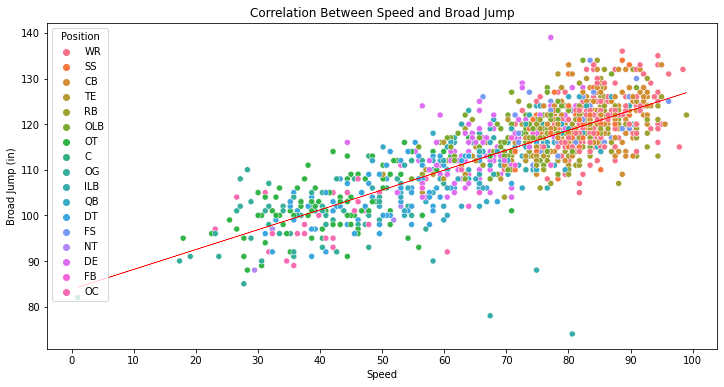

In [6]:
#Linear Regression Showing Correlation b/w Speed and Broad Jump Distance

fort = draft[draft['Broad Jump (in)'] != 'N/A']
fort = fort[fort['40 Yard Dash'] != 'N/A']
fort['40 Yard Dash'] = fort['40 Yard Dash'].apply(floatify)
fort['Broad Jump (in)'] = fort['Broad Jump (in)'].apply(intify)
fotie = fort['40 Yard Dash']
bj = fort['Broad Jump (in)']


def spdrating(x): #gives player speed rating on a 1-99 scale based on 40 yard dash time
    rnge = np.min(fotie) - np.max(fotie)
    rate = 0 - 100
    spd = abs((((x - np.max(fotie)) * rate) / rnge) + 1)    
    return round(spd, 2)

m, yb = np.polyfit(spdrating(fotie), bj, 1)
a, b, c = np.polyfit(spdrating(fotie), bj, 2)
x = spdrating(fotie)
y = m * x + yb

plt.figure(figsize = (12, 6))
plt.xlabel('Speed')
plt.ylabel('Broad Jump (in)')
plt.xticks(np.arange(0, 110, 10))
plt.title('Correlation Between Speed and Broad Jump')
sb.scatterplot(data = fort, x = spdrating(fotie), y = bj, hue = 'Position')
plt.plot(x, y, color = 'r', linewidth = .5);

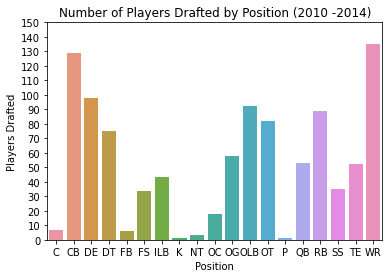

In [7]:
#Bar Chart Showing Number of Players Drafted by Position
drafted = combine[combine["Round Drafted"]!="Undrafted"]
posdraft = drafted.groupby('Position', as_index = False).agg({'Name' : 'count'})
posdraft = posdraft.rename(columns = {'Name' : 'Total Draft Picks'})

sb.barplot(x = 'Position', y = 'Total Draft Picks', data = posdraft)
plt.yticks(np.arange(0, 160, 10))
plt.title('Number of Players Drafted by Position (2010 -2014)')
plt.ylabel('Players Drafted')
plt.xlabel('Position');

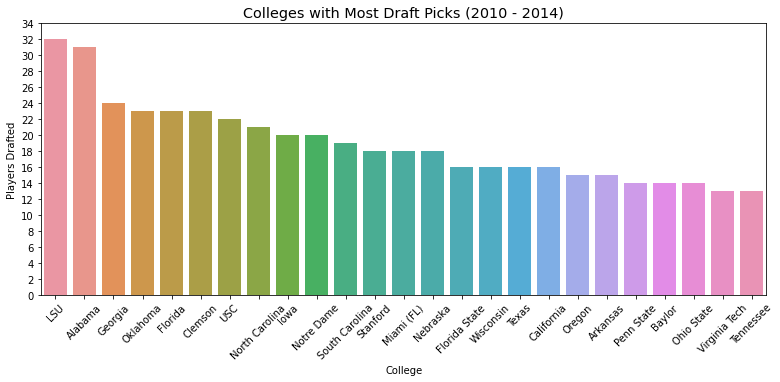

In [8]:
#Bar Chart Showing Colleges with Most Draft Picks
drafted.groupby("College", as_index = False).agg({"Round Drafted": "count"})
college_drafts = drafted.groupby("College", as_index = False).agg({"Round Drafted": "count"})
college_drafts = college_drafts.sort_values("Round Drafted", ascending = False)
college_drafts = college_drafts.rename(columns={"Round Drafted":"Drafted"})
college_drafts = college_drafts.head(25)

plt.figure(figsize = (13, 5))
sb.barplot(x = np.arange(1, 26), y = "Drafted", data = college_drafts)
plt.xticks(np.arange(0,25), labels = college_drafts["College"], rotation = 45)
plt.yticks(np.arange(0,36,2))
plt.title("Colleges with Most Draft Picks (2010 - 2014)", size = "x-large")
plt.xlabel("College")
plt.ylabel("Players Drafted");

# Hypothesis 1

$H_{0}$:
- Cornerbacks and Wide Receivers do not have a significant difference in speed 

$H_{a}$:
- Corners are faster than receivers

Test statistic:
- Difference of mean 40 yd dash times

Observed Value:
- 0.0017272669585626232

Significance Level: 
- α = .05

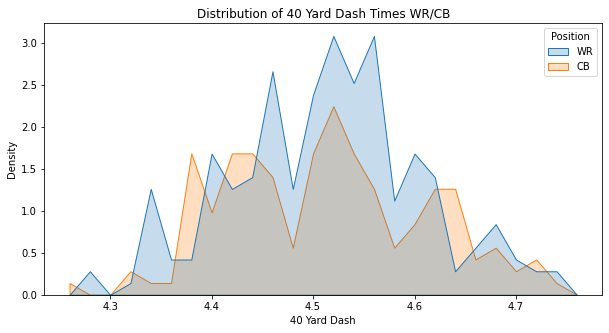

In [9]:
#40 Yard Dash data from all wide receivers and cornerbacks with available 40 time
wr = draft[draft['Position'] == 'WR']
cb = draft[draft['Position'] == "CB"]
cb = cb[cb['40 Yard Dash'] != 'N/A']
wr = wr[wr['40 Yard Dash'] != 'N/A']
wrcb = wr.append(cb)
#Data Viz
plt.figure(figsize = (10,5))
plt.title('Distribution of 40 Yard Dash Times WR/CB')
sb.histplot(data = wrcb, x = '40 Yard Dash', stat = 'density', binwidth = .02, hue = 'Position',  element="poly");

In [10]:
observed = abs(np.mean(wr['40 Yard Dash']) - np.mean(cb['40 Yard Dash']))

position = wr['Position'].append(cb['Position'])
forty = wr['40 Yard Dash'].append(cb['40 Yard Dash'])
fortydf = pd.DataFrame({'Position' : position, '40 Yard Dash' : forty})

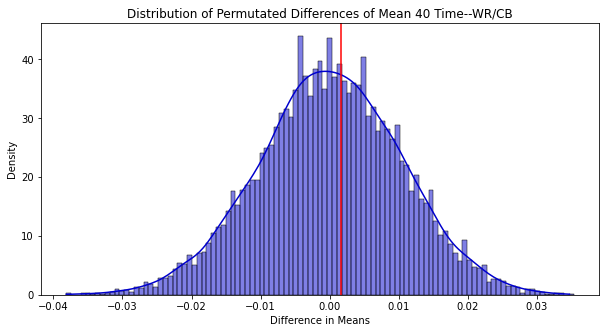

In [11]:
#Permutation Test
n = 10000
diffs = []

for i in np.arange(n):
    shufflepos = np.random.choice(fortydf['Position'], len(fortydf['Position']), replace = False)
    wrshuffle = fortydf[shufflepos == 'WR']
    cbshuffle = fortydf[shufflepos == 'CB']
    meanwr = np.mean(wrshuffle['40 Yard Dash'])
    meancb = np.mean(cbshuffle['40 Yard Dash'])
    stat = (meanwr - meancb)
    diffs.append(stat)
    
plt.figure(figsize = (10, 5))
sb.histplot(data = diffs, kde = True, stat = 'density', binwidth = 0.0007, color = 'mediumblue')
plt.title('Distribution of Permutated Differences of Mean 40 Time--WR/CB')
plt.xlabel('Difference in Means')
plt.axvline(x = observed, color = 'r');

In [12]:
P = np.sum(np.array(diffs) > observed) / len(diffs)
print('The p-value is ' + str(P))

The p-value is 0.4372


P Value is greater than the significance value (.05). Accept null hypothesis; cornerbacks and wide receivers have no significant speed difference on average.

Since cornerbacks are tasked with covering wide receivers, it makes sense that they would have to be similar in speed. I hypothesized they might be a little bit faster than receivers because they tend to be slightly smaller, but according to this test there's no difference in their speed.

# Hypothesis 2

$H_{0}$:
- There is no significant difference in strength between players from the SEC conference and players from the PAC-12 conference

$H_{a}$:
- SEC players are stronger than PAC-12 players

Test Statistic:
- Difference in mean bench press reps

Observed Value: 
- 0.5707453416149058

Significance Level: 
- α = .05

In [13]:
PAC12 = ['UCLA', 'USC', 'Stanford', 'Arizona', 'Arizona St.', 'Oregon', 'Oregon St.', 'Colorado', 'California', 'Utah', 'Washington St.']
SEC = ['Florida', 'Georgia', 'Missouri', 'Alabama', 'Kentucky', 'Tennessee', 'South Carolina', 'Vanderbilt', 'Texas A&M', 'Auburn', 'Ole Miss', 'LSU', 'Arkansas', 'Mississippi St.']

In [14]:
def conf(college):
    if college in PAC12:
        return 'PAC-12'
    elif college in SEC:
        return 'SEC'
    else:
        return 'Other'

In [15]:
draft['Conference'] = draft['College'].apply(conf)
draft = draft[draft['Bench Press Reps'] != 'N/A']
draft['Bench Press Reps'] = draft['Bench Press Reps'].apply(intify)

sec = draft[draft['Conference'] == 'SEC']
pac12 = draft[draft['Conference'] == 'PAC-12']

conference = sec.append(pac12)
confstrng = conference[['Name', 'Position', 'Bench Press Reps', 'Conference']]

conference = confstrng['Conference']
reps = confstrng['Bench Press Reps']

confstrng.head()

,Name,Position,Bench Press Reps,Conference
12,Lamin Barrow,OLB,22,SEC
13,Odell Beckham,WR,7,SEC
14,Deion Belue,CB,11,SEC
21,Alfred Blue,RB,13,SEC
28,Chris Boyd,WR,12,SEC


In [16]:
obs = abs(np.mean(pac12['Bench Press Reps']) - np.mean(sec['Bench Press Reps']))
obs

0.5707453416149058

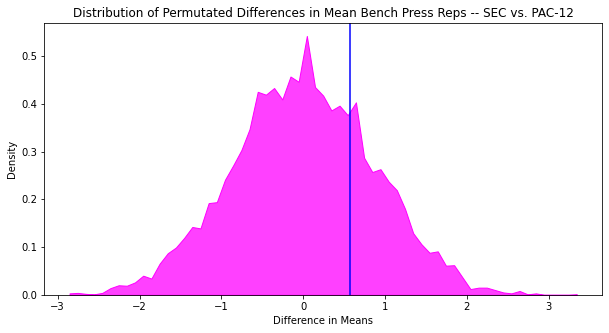

In [17]:
n = 10000
diffs = []

for i in np.arange(n):
    shufflecon = np.random.choice(conference, len(conference), replace = False)
    secshuff = confstrng[shufflecon == 'SEC']
    pacshuff = confstrng[shufflecon == 'PAC-12']
    meansec = np.mean(secshuff['Bench Press Reps'])
    meanpac = np.mean(pacshuff['Bench Press Reps'])
    stat = meansec - meanpac
    diffs.append(stat)
plt.figure(figsize = (10, 5))
sb.histplot(data = diffs,  
            stat = 'density', 
            binwidth = 0.1,
            color = 'magenta',
            element = 'poly')
plt.title('Distribution of Permutated Differences in Mean Bench Press Reps -- SEC vs. PAC-12')
plt.xlabel('Difference in Means')
plt.axvline(x = obs, color = 'blue');

In [18]:
p_value = sum(np.array(diffs) >= obs) / len(diffs)
p_value

0.2562

P Value is greater than the significance value, not enough evidence to reject null hypothesis; conclude that SEC players and PAC-12 players have no significant strength difference.

Common belief is that football in the South is more centered around strength and power, whereas West Coast football is centered around agility and finesse, but this test shows an insignificant difference between the strength of players from these areas.

# Conclusion

In this analysis I was able to analyze the combine data through visualizations and test specific hypotheses regarding how certain statistics relate to each other. In particular I used linear regression to visualize the correlation between a players speed and their broad jump distance, I was able to see which universities send the most players to the NFL, and I saw which position has the most draft picks. Through permutation testing I tested hypotheses regarding the difference in speed between wide receivers and cornerbacks, and the difference in strength between players from the PAC-12 and players from the SEC.

I concluded through my hypothesis tests that, wide receivers and corners do not have a tangible speed difference, and PAC-12 players are equally as strong as SEC players.